## **ISING MODEL WITHOUT CHECKERBOARD UPDATE**

In [81]:
import matplotlib.pyplot as plt
import numpy as np
from numba import njit #For Faster Computation

## Snapshots of after reaching equilibrium

In [211]:
def Ising_system(N): #To create random spin system
    spin = np.random.choice([-1, 1], (N, N))
    return spin

In [212]:
@njit
def update_spin(spin, T): #One update with N**2 central spin selection
    N = len(spin[0])
    for a in range(N):
        for b in range(N):                   
            i, j = np.random.randint(0, N, 2)
            s = spin[i, j]
            nn = (spin[(i + 1)%N, j] + spin[(i - 1)%N, j] + spin[i, (j + 1)%N]  + spin[i, (j - 1)%N])
            delta_E = 2*nn*s
            if delta_E < 0 or np.random.random() < np.exp(-delta_E/T): #Boltzmann update
                 spin[i, j] = -s
    return spin

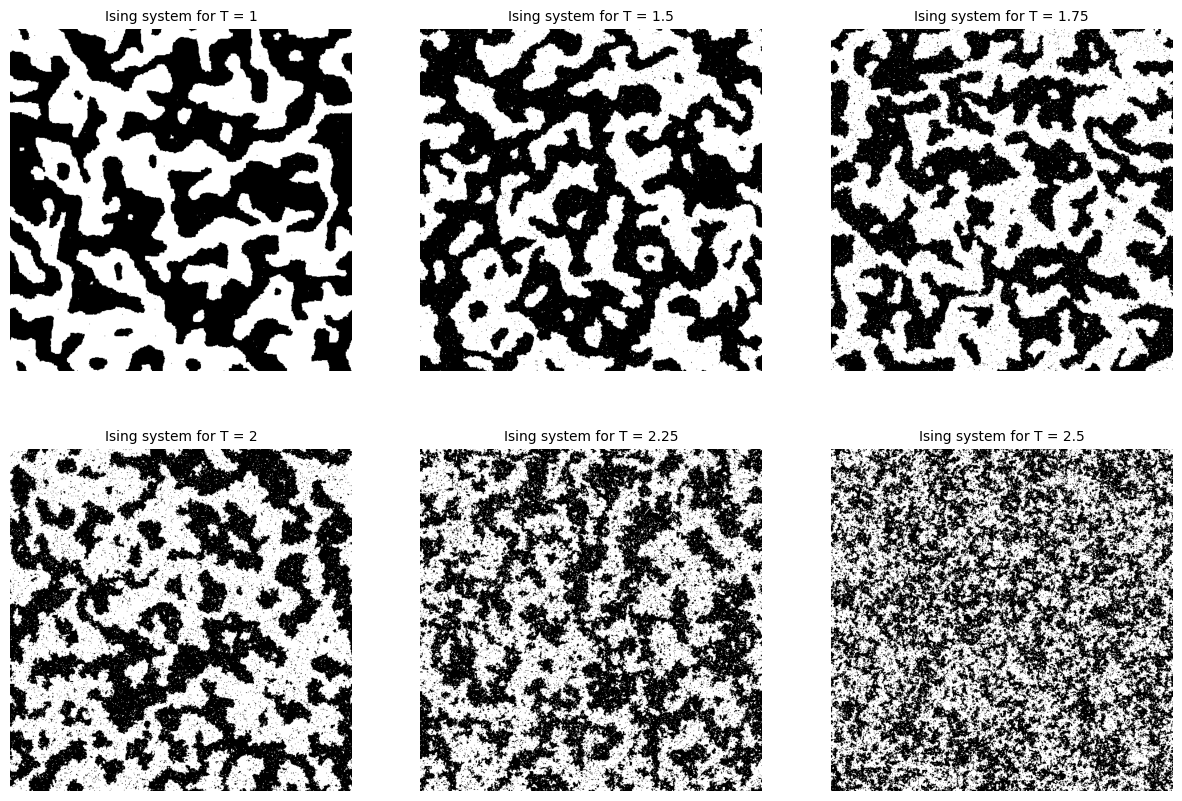

In [213]:
T_val = [1, 1.5, 1.75, 2, 2.25, 2.5]
pl = 0
plt.figure(figsize = (15, 10))
for T in T_val:
    spin = Ising_system(600)
    for i in range(200):
        spin = update_spin(spin, T)
    pl += 1
    plt.subplot(2, 3, pl)
    plt.imshow(spin, cmap = 'gray')
    plt.title(f"Ising system for T = {T}", size = 10)
    plt.axis('off')
plt.show()

## ***Snapshots after 200 iterations***

## **Average Magnetization**

In [205]:
@njit
def Magnetization(spin, N_eq, N_iter, T):
    for i in range(N_eq):
        spin = update_spin(spin, T)
    M_av = np.empty(N_iter)
    M2_av = np.empty(N_iter)
    for j in range(N_iter):
        spin = update_spin(spin, T)
        M_av[j] = abs(np.mean(spin))
        M2_av[j] = abs(np.mean(spin))**2
    return np.mean(M_av), np.mean(M2_av)

In [206]:
N = 20
Temperature = np.linspace(1, 4, 30)
M_T = []
for Temp in Temperature:
    spin = Ising_system(N)
    M_av = Magnetization(spin, 300, 10000, Temp)[0]
    M_T.append(M_av)

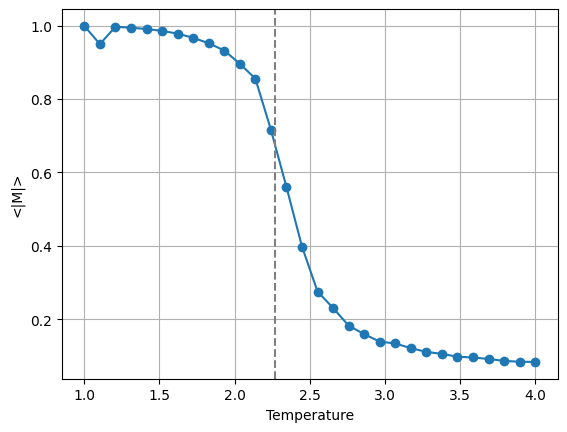

In [207]:
plt.plot(Temperature, M_T, marker = 'o')
plt.grid()
plt.xlabel("Temperature")
plt.axvline(2.269, ls='--', color='gray', label=r'$T_c$')
plt.ylabel("<|M|>")
plt.show()

## **Average Energy**

In [194]:
@njit
def En(spin):
    energy = 0
    N = len(spin[0])
    for i in range(N):
        for j in range(N):
            s = spin[i, j]
            nn = (spin[(i + 1)%N, j] + spin[(i - 1)%N, j] + spin[i, (j + 1)%N] + spin[i, (j - 1)%N])
            energy += -s*nn
    return energy/(4*N*N)

In [200]:
@njit
def Average_En(spin, N_eq, N_iter, T):
    for i in range(N_eq):
        spin = update_spin(spin, T)
    E_av = np.empty(N_iter)
    E2_av = np.empty(N_iter)
    for j in range(N_iter):
        spin = update_spin(spin, T)
        E_av[j] = En(spin)
        E2_av[j] = En(spin)*En(spin)
    return np.mean(E_av), np.mean(E2_av)

In [201]:
N = 20
Temperature = np.linspace(1, 4, 30)
E_T = []
for Temp in Temperature:
    spin = Ising_system(N)
    E_av = Average_En(spin, 300, 40000, Temp)[0]
    E_T.append(E_av)

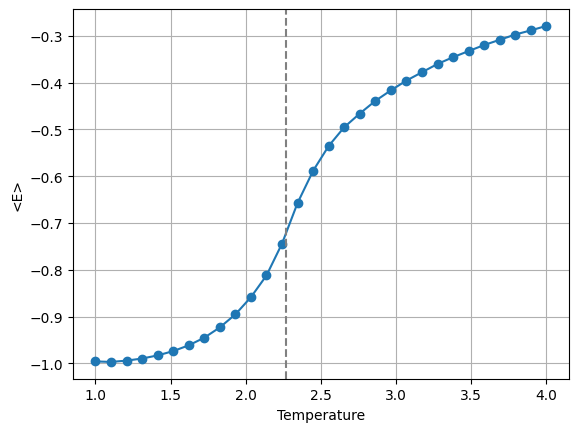

In [202]:
plt.plot(Temperature, E_T, marker = 'o')
plt.grid()
plt.xlabel("Temperature")
plt.axvline(2.269, ls='--', color='gray', label=r'$T_c$')
plt.ylabel("<E>")
plt.show()

## **Specific Heat**

In [203]:
C_T = []
for Temp in Temperature:
    spin = Ising_system(N)
    E, E2 = Average_En(spin, 300, 40000, Temp)
    C_T.append((E2 - E**2)/Temp**2)

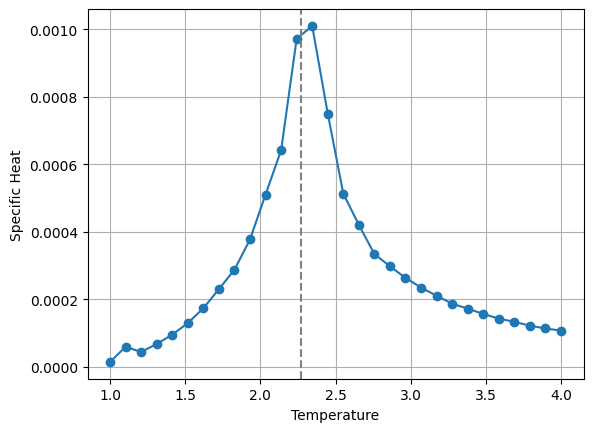

In [204]:
plt.plot(Temperature, C_T, marker = 'o')
plt.grid()
plt.xlabel("Temperature")
plt.axvline(2.269, ls='--', color='gray', label=r'$T_c$')
plt.ylabel("Specific Heat")
plt.show()

We know that, $<E^2> - <E>^2 = K_BT^2C_v$; here I took $K_B$ = 1

In [208]:
X_T = []
for Temp in Temperature:
    spin = Ising_system(N)
    M, M2 = Magnetization(spin, 300, 20000, Temp)
    X_T.append((M2 - M**2)/Temp)

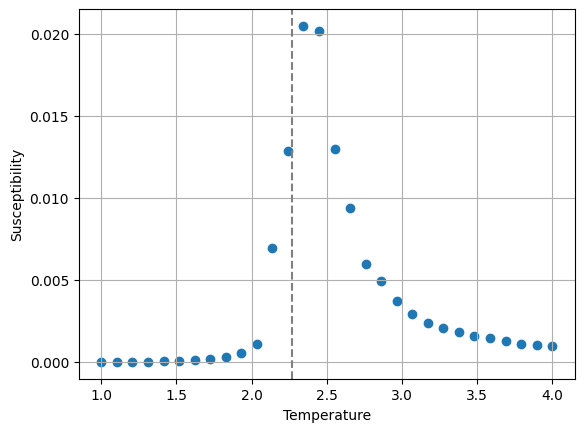

In [210]:
plt.scatter(Temperature, X_T)
plt.grid()
plt.xlabel("Temperature")
plt.axvline(2.269, ls='--', color='gray', label=r'$T_c$')
plt.ylabel("Susceptibility")
plt.show()

We know that, $<M^2> - <M>^2 = K_BTX$; here I took $K_B$ = 1